<a href="https://colab.research.google.com/github/ihkcreations/CSE366-4-2020-3-60-073/blob/main/practice_assign1_cse366.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import heapq

# PriorityQueue Class

In [2]:
class PriorityQueue:
  def __init__(self):
    self.elements = []

  def empty(self):
    return len(self.elements) == 0

  def put(self, item, priority):
    heapq.heappush(self.elements, (priority, item))

  def get(self):
    return heapq.heappop(self.elements)[1]

# Node Class

In [3]:
class Node:
  def __init__(self, state, parent = None, action = None, path_cost = 0):
    self.state = state
    self.parent = parent
    self.action = action
    self.path_cost = path_cost

  def __lt__(self, other):
    return self.path_cost < other.path_cost

# Environment Class

In [4]:
class Environment:
  def __init__(self, grid, start, goal):
    self.grid = grid
    self.initial = start
    self.goal = goal

  def actions(self, state):
    possible_actions = ['UP','DOWN','LEFT','RIGHT']
    x, y = state

    if x == 0 or self.grid[x-1][y] == 1:
      possible_actions.remove('UP')
    if x == len(self.grid) - 1 or self.grid[x + 1][y] == 1:
      possible_actions.remove('DOWN')
    if y == 0 or self.grid[x][y-1] == 1:
      possible_actions.remove('LEFT')
    if y == len(self.grid[0]) - 1 or self.grid[x][y + 1] == 1:
      possible_actions.remove('RIGHT')

    return possible_actions

  def result(self, state, action):
    x, y = state
    if action == 'UP':
      return (x - 1, y)
    if action == 'DOWN':
      return (x + 1, y)
    if action == 'LEFT':
      return (x, y - 1)
    if action == 'RIGHT':
      return (x, y + 1)


  def is_goal(self, state):
        return state == self.goal

  def get_grid_size(self):
    return len(self.grid)

# Agent Class

In [5]:
class Agent:

  def __init__(self, env):
    self.env = env
    self.cost_so_far = {}
    self.came_from = {}

  def ucs(self):
    frontier = PriorityQueue()
    frontier.put(Node(self.env.initial, path_cost = 0), 0)
    self.came_from = {self.env.initial: None}
    self.cost_so_far = {self.env.initial: 0}

    while not frontier.empty():
      current_node = frontier.get()

      if self.env.is_goal(current_node.state):
        return self.reconstruct_path(self.came_from, current_node.state)

      for action in self.env.actions(current_node.state):
        new_state = self.env.result(current_node.state, action)
        new_cost = self.cost_so_far[current_node.state] + 1
        if new_state not in self.cost_so_far or new_cost < self.cost_so_far[new_state]:
          self.cost_so_far[new_state] = new_cost
          priority = new_cost
          frontier.put(Node(new_state, current_node, action, new_cost), priority)
          self.came_from[new_state] = current_node.state

    return []

  def cost_far(self):
    return self.cost_so_far

  def came_fr(self):
    return self.came_from

  def reconstruct_path(self, came_from, current):
      path = []
      while current in came_from:
          path.append(current)
          current = came_from[current]
      path.append(self.env.initial)
      path.reverse()
      return path

# Visualization Class


In [6]:
# Visualization Function plots the grid and the found path.
def visualize_grid_and_path(grid, path):
    grid_array = np.array(grid)  # Convert grid to numpy array for easy plotting.
    fig, ax = plt.subplots()
    ax.imshow(grid_array, cmap='Greys', alpha=0.3)  # Grid background.
    start = path[0]
    goal = path[-1]
    ax.plot(start[1], start[0], 'bs', markersize=10)  # Start position in blue.
    ax.plot(goal[1], goal[0], 'gs', markersize=10)  # Goal position in green.
    xs, ys = zip(*path)  # Extract X and Y coordinates of the path.
    ax.plot(ys, xs, 'y-', linewidth=2)  # Plot the path in red.
    ax.set_xticks(np.arange(-.5, len(grid[0]), 1), minor=True)
    ax.set_yticks(np.arange(-.5, len(grid), 1), minor=True)
    ax.grid(which="minor", color="b", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", size=0)
    ax.tick_params(which="major", bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.show()

# Simulation

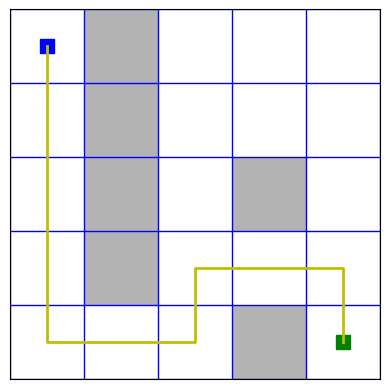

In [7]:
# Define the grid, start position, and goal position
grid = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0]
]

start = (0, 0)
goal = (4, 4)

# Create the environment and agent
environment = Environment(grid, start, goal)
agent = Agent(environment)

# Solve the problem with Uniform Cost Search
solution_path = agent.ucs()

# Visualize the solution
visualize_grid_and_path(grid, solution_path)

# Debugging some sections

In [ ]:
agent.cost_far()

{(0, 0): 0,
 (1, 0): 1,
 (2, 0): 2,
 (3, 0): 3,
 (4, 0): 4,
 (4, 1): 5,
 (4, 2): 6,
 (3, 2): 7,
 (2, 2): 8,
 (3, 3): 8,
 (1, 2): 9,
 (3, 4): 9,
 (0, 2): 10,
 (1, 3): 10,
 (2, 4): 10,
 (4, 4): 10,
 (0, 3): 11,
 (1, 4): 11}

In [ ]:
agent.came_fr()

{(0, 0): None,
 (1, 0): (0, 0),
 (2, 0): (1, 0),
 (3, 0): (2, 0),
 (4, 0): (3, 0),
 (4, 1): (4, 0),
 (4, 2): (4, 1),
 (3, 2): (4, 2),
 (2, 2): (3, 2),
 (3, 3): (3, 2),
 (1, 2): (2, 2),
 (3, 4): (3, 3),
 (0, 2): (1, 2),
 (1, 3): (1, 2),
 (2, 4): (3, 4),
 (4, 4): (3, 4),
 (0, 3): (0, 2),
 (1, 4): (2, 4)}

In [8]:
environment.get_grid_size()

5